<a href="https://colab.research.google.com/github/SobiaNoorAI/Wholesale-Customer-Segmentation-and-Spending-Behavior-Analysis-By-ML/blob/main/Logistic_Regression_Wholesale_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Channel Prediction Model using Logistic Regression 🚀


# 1️⃣ Problem Statement

Predict the customer's channel (Horeca or Retail) based on product categories purchase.

#2️⃣ Import Required Libraries

In [2]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#3️⃣ Load & Explore Dataset

In [3]:
# load data
Wholesale_df=pd.read_csv("https://raw.githubusercontent.com/SobiaNoorAI/Wholesale-Customer-Segmentation-and-Spending-Behavior-Analysis-By-ML/main/Data/Wholesale%20customers%20data.csv")
Wholesale_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# Description of the dataset
Wholesale_df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [5]:
# info of the dataset
Wholesale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
#shape
Wholesale_df.shape

(440, 8)

#4️⃣ Preprocessing Data

## Data cleaning

In [ ]:
# Check for missing values
print(Wholesale_df.isnull().sum())

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [13]:
# Check for duplicate values
print(Wholesale_df.duplicated().sum())

0


## Extract Input, Output Variables

In [15]:
# Define features and target variable

# Features or Input data or Independent Variable
x = Wholesale_df.drop(["Channel", "Region"], axis=1)

# Target(1 = Horeca, 2 = Retail) or Output data or Dependent Variable
y = Wholesale_df["Channel"]

# Check if Channel Column is removed
x.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


## Split Dataset

In [16]:
# Train-test split (70-30 ratio)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
x_train.shape, x_test.shape

((308, 6), (132, 6))

## Scaling

In [17]:
# Standardizing numerical features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# To 5 Rows
x_test[:5]

array([[ 1.07086409, -0.28416988, -0.68134266,  1.89116372, -0.56122912,
        -0.03974786],
       [-0.47108808, -0.76122738, -0.84689295, -0.46130653, -0.62739623,
        -0.38856717],
       [-0.76046037, -0.12049081, -0.17398704,  0.01281299,  0.65110761,
        -0.44499382],
       [ 0.33607925,  0.09881584, -0.14025461, -0.52896495,  0.00785658,
         0.15934846],
       [-0.28216819, -0.55546357, -0.48629206, -0.72734452, -0.61697431,
         0.31836903]])

In [18]:
# Define features and target variable

# Features or Input data or Independent Variable
x = Wholesale_df.drop(["Channel", "Region"], axis=1)

# Target(1 = Horeca, 2 = Retail) or Output data or Dependent Variable
y = Wholesale_df["Channel"]

# Check if Channel Column is removed
x.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [19]:
# Check Channel Column values
y.head(10)

,Channel
0,2
1,2
2,2
3,1
4,2
5,2
6,2
7,2
8,1
9,2


#5️⃣ Train Model with Logistic Regression

In [21]:
# Initialize and train the model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

#6️⃣ Model Evaluation

In [22]:
# Make predictions
y_pred = model.predict(x_test)
# Actual Vs Predicted Output
print("Actual Output:   ", list(y_test))
print("Predicted Output:", list(y_pred))

Actual Output:    [1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2]
Predicted Output: [1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2]


In [23]:
# Accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8787878787878788


In [24]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           1       0.88      0.94      0.91        84
           2       0.88      0.77      0.82        48

    accuracy                           0.88       132
   macro avg       0.88      0.86      0.87       132
weighted avg       0.88      0.88      0.88       132



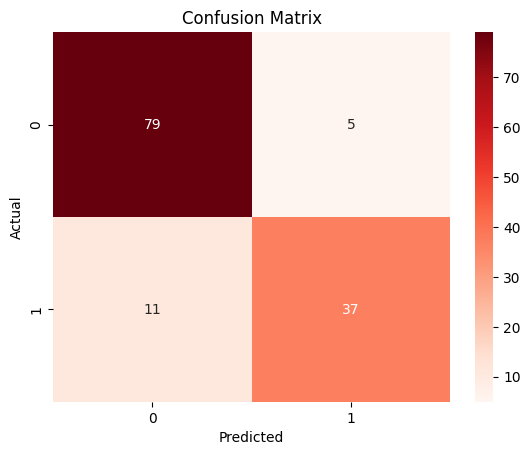

In [25]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()